In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
from pathlib import Path

In [8]:
path = Path('/Users/hargunoberoi/Desktop/fastai/2020')
import os
os.listdir(path)

['Slips2019.ipynb',
 'Screenshot 2019-12-13 at 5.41.41 AM.png',
 'Dreams2019.csv',
 'Screenshot 2019-12-13 at 1.34.30 PM.png',
 'Interview.pdf',
 'Plutot.mov',
 '.ipynb_checkpoints',
 'Slips2019.csv']

In [12]:
names = ['timestamp','date','slip','correction']

In [16]:
slips = pd.read_csv(path/'Slips2019.csv',header = None, names = names,skiprows =1)

In [20]:
slips.timestamp = pd.to_datetime(slips.timestamp)

In [21]:
s = slips

In [23]:
s.sort_values(by = ['timestamp'],inplace = True)

In [28]:
s['month'] = [i.month for i in s.timestamp]

In [40]:
s.drop('month',axis = 1,inplace = True)

In [42]:
s['month'] = s.timestamp.dt.month

/Users/hargunoberoi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


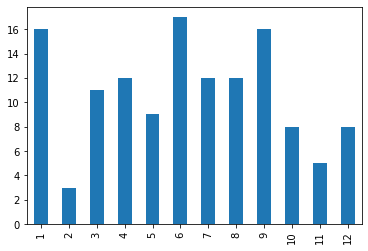

In [52]:
s['month'].value_counts().sort_index().plot('bar')

In [85]:
s.head()

,timestamp,date,slip,correction,month
0,2018-12-31 23:57:08,12/31/2018,I bought a alarm clock at Anupam stationary - ...,When you go to a place - plan and buy only wha...,12
1,2019-01-02 17:10:36,1/2/2019,I went in to speak to Lavanya - she was again ...,Stay relevant to the question - irrelevance is...,1
2,2019-01-04 02:07:51,1/4/2019,I spoke in detail with Kaustubh - I had my har...,Speak less,1
3,2019-01-07 14:05:21,1/7/2019,"ECN Interns Panel discussion - Firstly, I was ...",Check your clothes one night before! Don't wan...,1
4,2019-01-08 22:51:49,1/8/2019,I took a slice of cheese from Kaustubh's share...,"The small things, that's whats more important!...",1


In [86]:
iterator = enumerate(range(0,len(s)))

In [482]:
nxt = next(iterator)[0]

In [483]:
s.loc[nxt].timestamp.strftime('%d-%b-%Y'),s.loc[nxt].slip

('30-Dec-2019',
 'I decided to buy samosas, vada pav and juice for some beggar, turned out he was a pro, and he REFUSED to take the food, just the money. It really sucked because I felt like an idiot. First I thought it was a lady, it was a bloody man! And he was just acting because when I gave him the food, he was being his usual self')

In [484]:
s.loc[nxt].correction

'How could I have avoided this slip?\nThere were hints, for example, his location, was prime! He was milking the situation. The key was to take cognisance of those hints.'

Top3:
1. Overconversation
2. Forgetting things (on stove, food outside, money)
3. Late action regret

In [493]:
col_names = ['timestamp','date','weight','comments']

In [494]:
wgt = pd.read_csv(path/'weight.csv',skiprows = 1, names = col_names)

In [497]:
wgt.timestamp = pd.to_datetime(wgt.timestamp)

In [508]:
w19 = wgt[wgt.timestamp.dt.year == 2019]

In [509]:
w19.sort_values(by = ['timestamp'],inplace = True)

/Users/hargunoberoi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


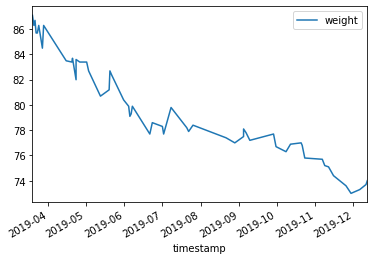

In [510]:
w19.plot(x ='timestamp',y='weight')

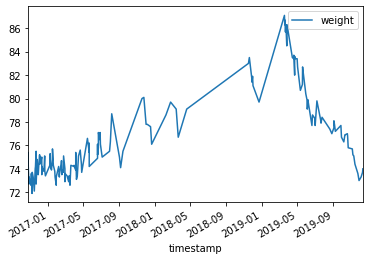

In [511]:
wgt.plot(x = 'timestamp', y='weight')

In [527]:
w19[w19.timestamp.dt.month <8].weight.mean(),w19[w19.timestamp.dt.month <8].weight.std()

(82.05294117647061, 2.985848977702499)

(76.56536312849165, 3.5787491156220264)